<br>
<img align="center" src="imagenes/logo.png"  width="200" height="141">
<font size=36><center> Machine Learning con Python </center> </font>
<br>

<h1 align='center'> Modulo IV: Machine Learning </h1>
<h2 align='center'>  K-Means </h2> 

---

# Aspectos teóricos

## Introducción

El algoritmo **K-Means** divide un conjunto de $N$ muestras de $X$ en $K$  clusters disjuntos, cada uno descrito por la media $\mu_j$ de las muestras del clúster. Las medias se denominan comúnmente los **"centroides" de los clusters**; note que no son, en general, puntos de $X$ , aunque vivan en el mismo espacio. El algoritmo K-means tiene como objetivo elegir los centroides que minimicen la inercia, o la suma de cuadrados dentro del clúster:

$$\sum_{i=0}^{n} \min_{\mu_j \in C} (||x_j-\mu_i||^2)$$



## Algoritmo

El algoritmo dde K-means usa un refinamiento iterativo que produce el resultado final. La entrada al algoritmo son el número de cluster $K$ y el dataset. El dataset es un conjunto de características de cada punto. El algoritmo comienza con una estomación de los $K$ centroides, los cuales pueden ser generados aleatoriamente o seleccionados aleatoriamente del dataset. El algoritmo entonces itera entre los siguientes dos pasos:

**Paso de asignación de datos:** Cada centroide define uno de los clusters. En este paso, cada punto es asignado a su centroide más cercado, basándose en la distancia euclídea al cuadrado. Más formalmente, si $c_i$ es del conjunto de centroides $C$, entonces cada punto $x$ se asigna a un cluster $C$ basado en:

$$arg\min_{c_i \in C}  dist(c_i, x)^2$$

donde $dist(.)$ es la distancia Euclídea. Este conjunto de puntos es asignado al conjunto $S_i$. 

**Paso de actualización de Centroides:** En este paso los centroides son recalculados. Para ello, se toma la media de todos los puntos de datos asignados al cluster de ese centroide.

$$c_i = \frac{1}{|S_i|} \sum_{x_i \in S_i} x_i$$

El algoritmo itera entre los pasos uno y dos hasta que se cumpla un criterio de parada (es decir, que ningún punto de datos cambie de cluster, que la suma de las distancias se minimice o que se alcance un número máximo de iteraciones).

Se garantiza que este algoritmo converge a un resultado. El resultado puede ser un óptimo local (es decir, no necesariamente el mejor resultado posible), lo que significa que evaluar más de una ejecución del algoritmo con centros de partida aleatorios puede dar un mejor resultado.

<img align="center" src="imagenes/kmeans.gif"  width="400" height="400">

# Práctica

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [12]:
data = pd.read_csv('datos/kmeans.csv', sep = '\t', names =['x1','x2'])

In [13]:
data.head()

,x1,x2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


In [14]:
X = np.array(data)

### Creamos el modelo y entrenamos

In [18]:
# Creamos el modelo para K = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [19]:
# Obtenemos los centroides
centroids = kmeans.cluster_centers_

# Obtenemos los clusters
assignments = kmeans.labels_

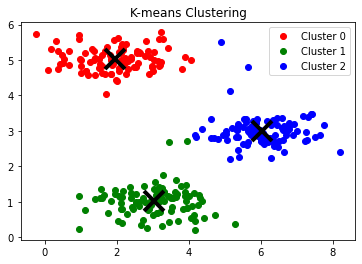

In [21]:
def plot_cluster(X, centroids, assignments, cluster, color):
    '''Se grafica los centroides y cada cluster.'''
    plt.plot(X[assignments == cluster, 0], X[assignments == cluster, 1], f'{color}o', label=f'Cluster {cluster}')
    plt.plot(centroids[cluster, 0], centroids[cluster, 1], 'kx', ms=20, mew=4)
    
# se grafica los clusters de colores distintos
for i, color in enumerate('rgb'):
    plot_cluster(X, centroids, assignments, i, color)    

plt.title('K-means Clustering')
plt.legend();